In [1]:
library(dplyr)
library(ggplot2)
library(ggpubr)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: magrittr



In [2]:
data = read.table('sort_data.csv', header = TRUE, stringsAsFactors = FALSE, sep = ',')[1:8,]
head(data, 10)

,X,Lymphocytes...Freq..of.Parent....,Lymphocytes.Single.Cells...Freq..of.Parent....,Lymphocytes.Single.Cells.Live.CD3....Freq..of.Parent....,Lymphocytes.Single.Cells.Live.CD3..CD19.CD20....Freq..of.Parent....,Lymphocytes.Single.Cells.Live.CD3..CD19.CD20..IgG....Freq..of.Parent....,Pn3IgG,Lymphocytes.Single.Cells.Live.CD3..CD19.CD20..IgM....Freq..of.Parent....,Pn3IgM,Pn3Total,IgG,OPA,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,Specimen_001_M274_002.fcs,93.8,98.5,59.6,61.9,20.5,2.480,69.6,0.800,1.240,67.600,1822,Vax
2,Specimen_001_M275_004.fcs,88.2,99.3,50.9,38.4,22.8,1.310,64.8,1.050,1.140,10.830,522,Vax
3,Specimen_001_M007_001.fcs,92.2,98.9,36.7,68.2,17.3,0.210,64.6,0.140,0.180,0.704,68,Vax
4,Specimen_001_M023_002.fcs,95.5,99.1,25.5,46.6,12.5,0.160,73.9,0.110,0.150,0.177,21,Vax
5,Specimen_001_M104_001.fcs,96.6,99.2,68.7,88.7,31.6,0.068,46.9,0.062,0.081,NA,NA,Control
6,Specimen_001_M108_005.fcs,91.8,98.2,37.9,48.3,19.2,0.160,60.8,0.170,0.200,NA,NA,Control
7,Specimen_001_M107_004.fcs,95.5,98.7,64.3,89.0,25.6,0.120,35.7,0.140,0.140,NA,NA,Control
8,Specimen_001_M286_003.fcs,94.4,99.0,52.1,58.6,21.1,0.720,63.2,0.420,0.530,52.365,743,Vax


In [3]:
source("L:/Duncan/kptumors_figures/figure_parameters.R")

In [5]:
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 8),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))


Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message in wilcox.test.default(c(-1.16749108729376, -0.795880017344075, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(-1.16749108729376, -0.795880017344075, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(-1.20760831050175, -0.769551078621726, :
"cannot compute exact p-value with ties"


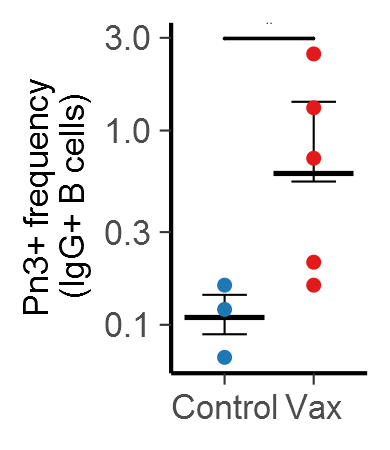

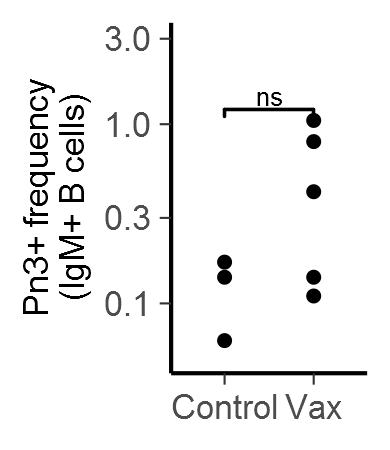

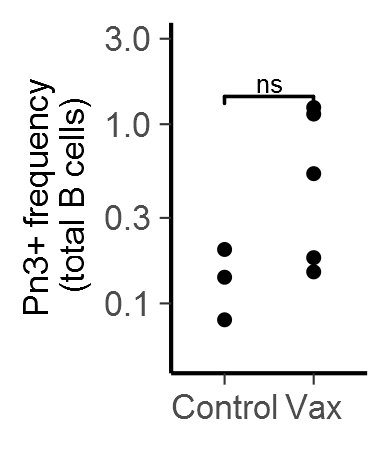

In [6]:
options(repr.plot.width = 1.3, repr.plot.height = 1.5, repr.plot.res = 300)
library(RColorBrewer)
data2  = data %>% group_by(Group) %>% summarize(sd = sd(Pn3IgG)/sqrt(n()), mean = mean(Pn3IgG)) %>% mutate(ymin = mean-sd, ymax = mean+sd)


g1 = ggplot(data, aes(x = Group, y = Pn3IgG, color = Group)) + stat_compare_means(tip.length = 0, comparison = list(c(1,2), label.y = 3.05), method.args = list(alternative = 'less'), label = 'p.signif') + theme_classic() + 
labs(x = c(), y = 'Pn3+ frequency\n(IgG+ B cells)') + Axis_themes + stat_summary(geom = 'crossbar', fun.y = mean, size = .177, color = 'black') +
geom_errorbar(data = data2, aes(ymin = ymin, ymax = ymax, y = mean), color = 'black', size = .177, width = .5) + guides(color = FALSE) + 
scale_color_manual(values = brewer.pal(6, 'Paired')[c(2,6)])  + geom_point(size = .8)  + scale_y_log10()
g1$layers[[1]]$aes_params$textsize <- 2.1167
g1

ggsave('Pheno/freq.pdf', useDingbats = FALSE, width = 1.2, height = 1.5)

g1 = ggplot(data, aes(x = Group, y = Pn3IgM)) + geom_point(size = .8)+ scale_y_log10(limits = c(.05, 3)) + stat_compare_means(comparison = list(c(1,2)), method.args = list(alternative = 'less'), label = 'p.signif') + theme_classic() + 
labs(x = c(), y = 'Pn3+ frequency\n(IgM+ B cells)') + Axis_themes
g1$layers[[2]]$aes_params$textsize <- 2.1167
g1

g1 = ggplot(data, aes(x = Group, y = Pn3Total)) + geom_point(size = .8)+ scale_y_log10(limits = c(.05, 3)) + stat_compare_means(comparison = list(c(1,2)), method.args = list(alternative = 'less'), label = 'p.signif') + theme_classic() + 
labs(x = c(), y = 'Pn3+ frequency\n(total B cells)') + Axis_themes
g1$layers[[2]]$aes_params$textsize <- 2.1167
g1


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



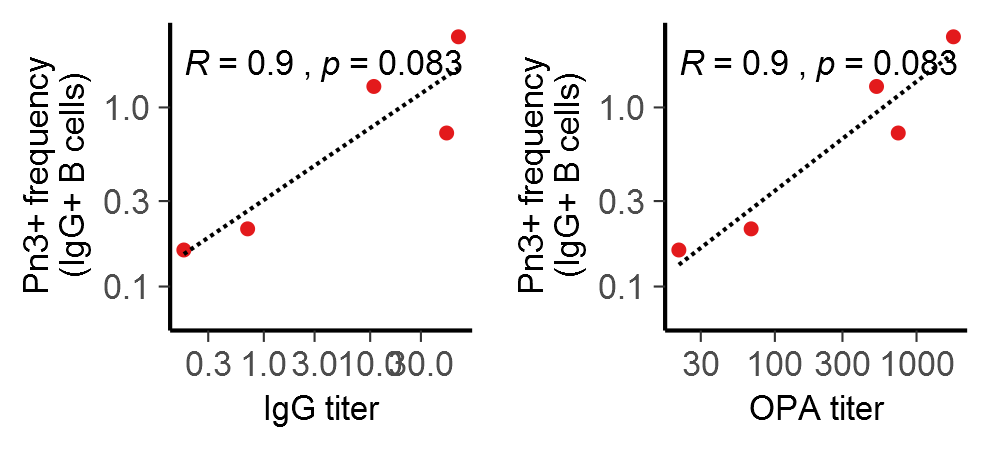

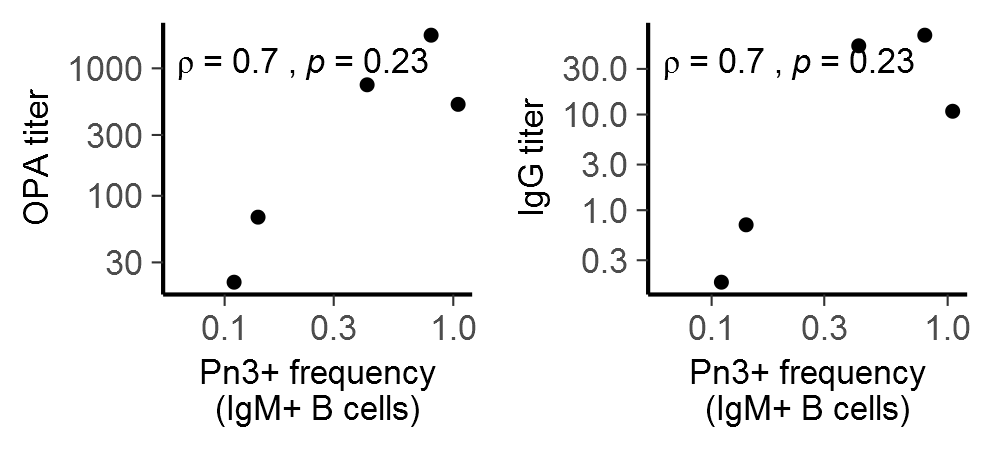

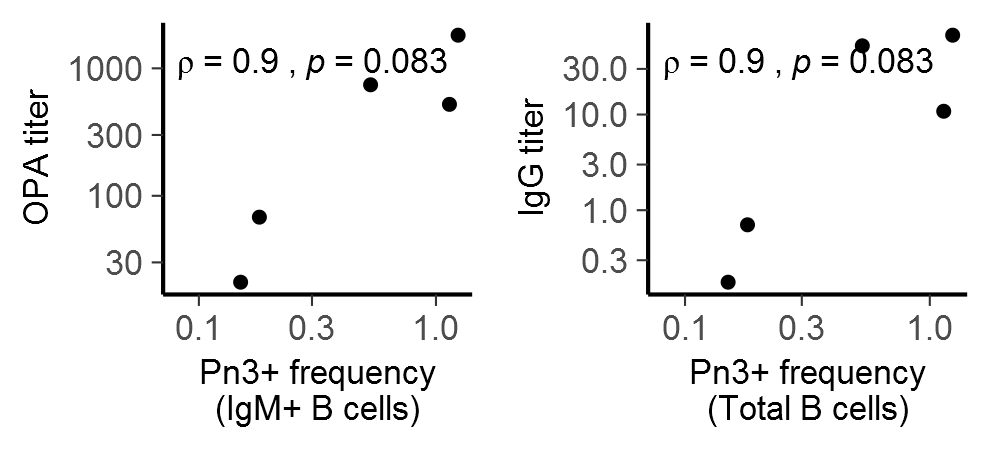

In [10]:
options(repr.plot.res = 300, repr.plot.width = 3.3, repr.plot.height = 1.5, warn = -1)
g1 = ggplot(data, aes(y = Pn3IgG, x = OPA, color = Group)) + geom_point(size = .8) + theme_classic() + stat_cor(color = 'black', method = 'spearman', size = 2.1167*8/6) + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(y = 'Pn3+ frequency\n(IgG+ B cells)', x = 'OPA titer') + scale_color_manual(values = brewer.pal(6, 'Paired')[c(2,6)])  + guides(color = FALSE)+ 
geom_smooth(method = 'lm', se= FALSE, color = 'black', size= .355, linetype = 'dashed')
 

g2 = ggplot(data, aes(y = Pn3IgG,x = IgG, color = Group)) + geom_point(size = .8) + theme_classic() + stat_cor(color = 'black',method = 'spearman', size = 2.1167*8/6) + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(y = 'Pn3+ frequency\n(IgG+ B cells)', x= 'IgG titer') + scale_color_manual(values = brewer.pal(6, 'Paired')[c(2,6)])   + guides(color = FALSE) + 
geom_smooth(method = 'lm', se= FALSE, color = 'black', size= .355, linetype = 'dashed')

cowplot::plot_grid(g2, g1)
ggsave('Pheno/freq_cor.pdf', height = 1.5, width = 3.3, useDingbats = FALSE)

g3 = ggplot(data, aes(x = Pn3IgM, y = OPA)) + geom_point(size = .8) + theme_classic() + stat_cor(method = 'spearman', size = 2.1167*8/6,cor.coef.name = 'rho') + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(x = 'Pn3+ frequency\n(IgM+ B cells)', y= 'OPA titer')


g4 = ggplot(data, aes(x = Pn3IgM, y = IgG)) + geom_point(size = .8) + theme_classic() + stat_cor(method = 'spearman', size = 2.1167*8/6,cor.coef.name = 'rho') + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(x = 'Pn3+ frequency\n(IgM+ B cells)', y= 'IgG titer')

cowplot::plot_grid(g3,g4)

g5 = ggplot(data, aes(x = Pn3Total, y = OPA)) + geom_point(size = .8) + theme_classic() + stat_cor(method = 'spearman', size = 2.1167*8/6,cor.coef.name = 'rho') + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(x = 'Pn3+ frequency\n(IgM+ B cells)', y= 'OPA titer')


g6 = ggplot(data, aes(x = Pn3Total, y = IgG)) + geom_point(size = .8) + theme_classic() + stat_cor(method = 'spearman', size = 2.1167*8/6,cor.coef.name = 'rho') + scale_y_log10() + scale_x_log10() +
Axis_themes + labs(x = 'Pn3+ frequency\n(Total B cells)', y= 'IgG titer')

cowplot::plot_grid(g5, g6)